In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import onumpy as np
#Changing working directory in order to easily access file
os.chdir('c:\\Users\\Rober')
os.getcwd()

'c:\\Users\\Rober'

In [271]:
df = pd.read_csv("~/Professional Bouts Ali.csv", index_col=False)

In [272]:
#Quick look at the dataframe
df.head(5)

,Result,Record,Opponent,Type,"Round, time",Date,Age(in years),Age(additional days),Location,Notes
0,Win,1–0,Tunney Hunsaker,UD,6,1960-10-29,18,286,"Freedom Hall, Louisville, Kentucky, U.S.",Not Available
1,Win,2–0,Herb Siler,TKO,"4 (8), 1:00",1960-12-27,18,345,"Municipal Auditorium, Miami Beach, Florida, U.S.",Not Available
2,Win,3–0,Tony Esperti,TKO,"3 (8), 1:30",1961-01-17,19,0,"Municipal Auditorium, Miami Beach, Florida, U.S.",Not Available
3,Win,4–0,Jim Robinson,KO,"1 (8), 1:34",1961-02-07,19,21,"Convention Center, Miami Beach, Florida, U.S.",Not Available
4,Win,5–0,Donnie Fleeman,RTD,6 (8),1961-02-21,19,35,"Municipal Auditorium, Miami Beach, Florida, U.S.",Not Available


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Result                61 non-null     object
 1   Record                61 non-null     object
 2   Opponent              61 non-null     object
 3   Type                  61 non-null     object
 4   Round, time           61 non-null     object
 5   Date                  61 non-null     object
 6   Age(in years)         61 non-null     int64 
 7   Age(additional days)  61 non-null     int64 
 8   Location              61 non-null     object
 9   Notes                 61 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.9+ KB


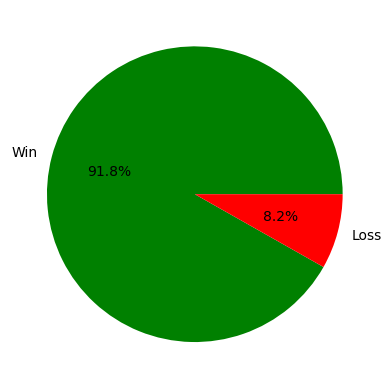

In [274]:
#Plotting Win vs Loss
result_count = df['Result'].value_counts()
mycolors = ["green", "red"]
plt.pie(result_count,labels = result_count.index, colors = mycolors, autopct='%1.1f%%')
plt.show()  

Text(0, 0.5, '#Fights')

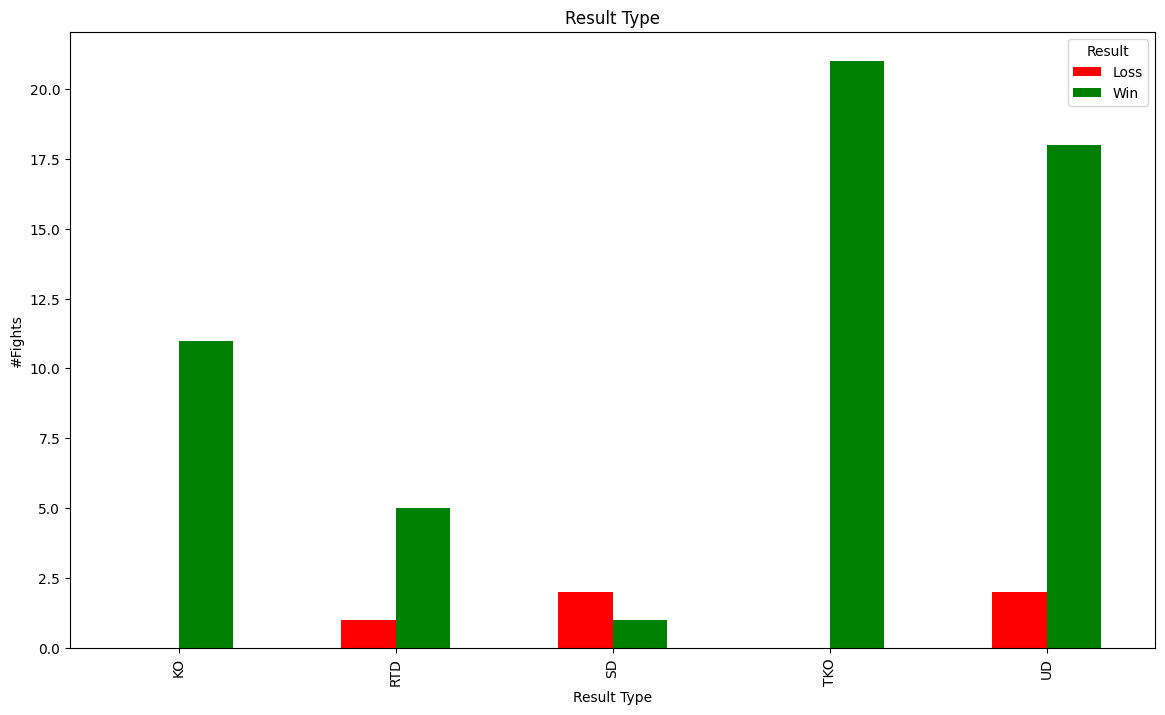

In [275]:
#Plotting Result type divided into whether it was a Win or Loss
ax = df.groupby(['Result','Type'])['Type'].count().unstack(0).plot.bar(title="Result Type", figsize=(14,8),
                                                                       color=['red','green'])
ax.set_xlabel('Result Type')
ax.set_ylabel('#Fights')

In [277]:
#Extracting Country from Location column
df['Country'] = df["Location"].str.rsplit(",").str[-1]

In [278]:
#Ensuring above code was accurate and only left Countries
df.Country.unique()


array([' U.S.', ' England', ' Canada', ' West Germany', ' Switzerland',
       ' Japan', ' Ireland', ' Indonesia', ' Zaire', ' Malaysia',
       ' Philippines', ' Puerto Rico', ' Bahamas'], dtype=object)

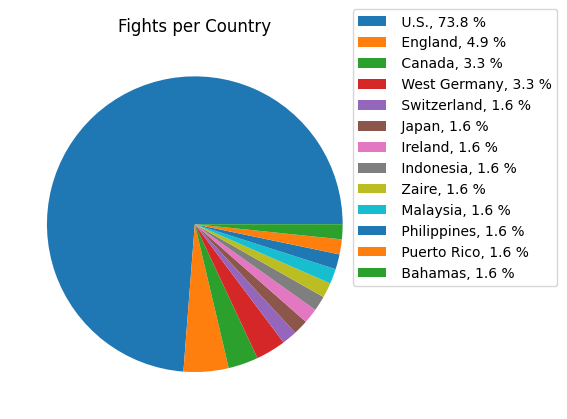

In [281]:
#With a country column I can now look at number of fights per country
country_count = df['Country'].value_counts()
plt.pie(country_count)
percents = country_count.to_numpy() * 100 / country_count.to_numpy().sum()
plt.legend( bbox_to_anchor=(1.5,1.1), loc='upper right',
            labels=['%s, %1.1f %%' % (l, s) for l, s in zip(country_count.index,percents)])
plt.title('Fights per Country')
plt.show()  

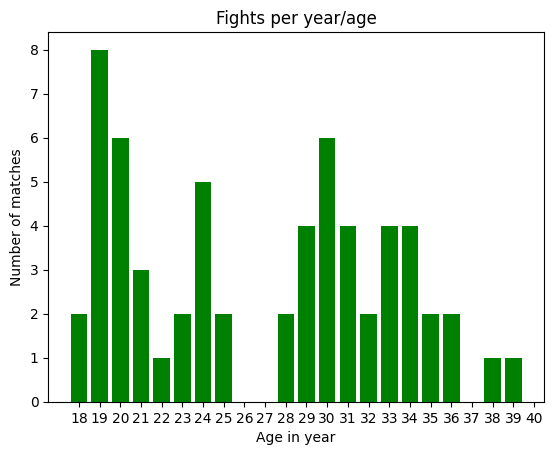

In [280]:
#Plotting fights by age
plt.hist(df['Age(in years)'], bins=range(18,41), align='left', histtype='bar', rwidth=0.8, color='green')
plt.xticks(range(18,41))
plt.xlabel('Age in year')
plt.ylabel('Number of matches')
plt.title('Fights per year/age')
plt.show()